In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#----------------------------------------------Netflix TV Shows and Movies-------------------------------------------------

In [11]:
df = pd.read_csv('D:\\Online courses\\Cousera\\project\\dataset\\Netflix_title.csv')

df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [12]:
df.shape

(5850, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [ ]:
#---------------------------------DATASET CLEANING ------------------------------

In [ ]:
#checking for null values

In [14]:
print(df.isnull().sum())

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64


In [ ]:
#checking for duplicate  rows

In [15]:
print(df.duplicated().sum())

0


In [ ]:
#removing null values

In [16]:
df['title']=df['title'].fillna('NO title')
df['description']=df['description'].fillna('').str.strip()
df['description']=df['description'].replace('','NO description')
df['age_certification']=df['age_certification'].fillna('TV-MA')
df['seasons'] = df['seasons'].fillna(1)
df['imdb_score'] = df['imdb_score'].fillna(df['imdb_score'].mean())

print(df.isna().sum())

id                        0
title                     0
type                      0
description               0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 403
imdb_score                0
imdb_votes              498
tmdb_popularity          91
tmdb_score              311
dtype: int64


In [17]:
new_imdb_id=[f'tt_custom_{i:04d}' for i in range(1, df['imdb_id'].isna().sum() + 1)]
df.loc[df['imdb_id'].isna(), 'imdb_id'] = new_imdb_id

print(df.isna().sum())

id                        0
title                     0
type                      0
description               0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                   0
imdb_score                0
imdb_votes              498
tmdb_popularity          91
tmdb_score              311
dtype: int64


In [18]:
df['imdb_votes'] = df['imdb_score'].fillna(df['imdb_score'].mean())
df['tmdb_popularity'] = df['imdb_score'].fillna(df['imdb_score'].mean())
df['tmdb_score'] = df['imdb_score'].fillna(df['imdb_score'].mean())

print(df.isna().sum())

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64


In [19]:
import sqlite3

In [20]:
conn = sqlite3.connect('Netflix_analysis.db')
cur=conn.cursor()

In [21]:
%load_ext sql
%sql sqlite:///Netflix_analysis.db

In [ ]:
#loading the file to database for opereations

In [85]:
df.to_sql('Netflix_data', conn, if_exists='replace', index=False)

5850

In [ ]:
#What is the total numbers of movies and shows?

In [72]:
query="""
SELECT type AS Content_type, 
COUNT(*) AS Type_count
FROM Netflix_data 
GROUP BY type
ORDER BY type DESC
LIMIT 3;
"""
Movie_Show=pd.read_sql(query,conn)
Movie_Show

,Content_type,Type_count
0,SHOW,2106
1,MOVIE,3744


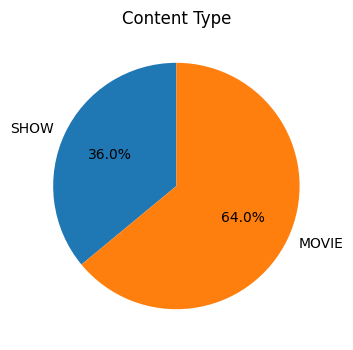

In [86]:
plt.figure(figsize=(8, 4))
plt.pie(Movie_Show['Type_count'],labels=Movie_Show['Content_type'],autopct='%1.1f%%', startangle=90)
plt.title('Content Type')  
plt.show()

In [ ]:
#top 10 show/movie and bottom 10 show/movie

In [23]:
query= """
SELECT title, 
type, 
imdb_score
FROM Netflix_data
WHERE type = 'MOVIE'
ORDER BY imdb_score DESC
LIMIT 10
"""
Top_10_Movies_with_Highest_Combined_IMDB= pd.read_sql(query, conn)
Top_10_Movies_with_Highest_Combined_IMDB

,title,type,imdb_score
0,Chhota Bheem & Krishna vs Zimbara,MOVIE,9.1
1,Major,MOVIE,9.1
2,C/o Kancharapalem,MOVIE,8.9
3,David Attenborough: A Life on Our Planet,MOVIE,8.9
4,Forrest Gump,MOVIE,8.8
5,Inception,MOVIE,8.8
6,GoodFellas,MOVIE,8.7
7,Anbe Sivam,MOVIE,8.7
8,A Lion in the House,MOVIE,8.7
9,Chhota Bheem & Krishna in Mayanagari,MOVIE,8.7


In [24]:
query = """
SELECT title, 
type, 
imdb_score
FROM Netflix_data
WHERE type = 'MOVIE'
ORDER BY imdb_score ASC
LIMIT 10
"""
Bottom_10_Movies_by_IMDB_Score = pd.read_sql(query, conn)
Bottom_10_Movies_by_IMDB_Score

,title,type,imdb_score
0,Aerials,MOVIE,1.5
1,Me Against You: Mr. S's Vendetta,MOVIE,1.6
2,Himmatwala,MOVIE,1.7
3,Kyaa Kool Hain Hum 3,MOVIE,1.9
4,FRED 3: Camp Fred,MOVIE,2.0
5,Hajwala: The Missing Engine,MOVIE,2.0
6,Dostana,MOVIE,2.1
7,B. A. Pass 2,MOVIE,2.2
8,Time to Dance,MOVIE,2.2
9,Nothing to Lose,MOVIE,2.3


In [25]:
query= """
SELECT title, 
type, 
imdb_score
FROM Netflix_data
WHERE type = 'SHOW'
ORDER BY imdb_score DESC
LIMIT 10
"""
Top_10_Show_with_Highest_Combined_IMDB= pd.read_sql(query, conn)
Top_10_Show_with_Highest_Combined_IMDB

,title,type,imdb_score
0,#ABtalks,SHOW,9.6
1,Breaking Bad,SHOW,9.5
2,Khawatir,SHOW,9.5
3,Avatar: The Last Airbender,SHOW,9.3
4,Our Planet,SHOW,9.3
5,Reply 1988,SHOW,9.2
6,My Mister,SHOW,9.1
7,The Last Dance,SHOW,9.1
8,Kota Factory,SHOW,9.1
9,Okupas,SHOW,9.0


In [26]:
query= """
SELECT title, 
type, 
imdb_score
FROM Netflix_data
WHERE type = 'SHOW'
ORDER BY imdb_score ASC
LIMIT 10
"""
Bottom_10_Show_with_Highest_Combined_IMDB= pd.read_sql(query, conn)
Bottom_10_Show_with_Highest_Combined_IMDB

,title,type,imdb_score
0,Thomas & Friends: All Engines Go!,SHOW,2.0
1,He's Expecting,SHOW,2.0
2,Hype House,SHOW,2.1
3,A House of Blocks,SHOW,2.3
4,Until Dawn,SHOW,2.4
5,The Goop Lab,SHOW,2.5
6,Byron Baes,SHOW,2.6
7,First Class,SHOW,2.8
8,Bonus Family,SHOW,2.9
9,Richie Rich,SHOW,3.0


In [ ]:
#Which year had the highest number of new releases on Netflix and its trend?

In [27]:
query= """
SELECT CONCAT(FLOOR(release_year / 10) * 10, 's') AS decade,
	COUNT(*) AS movies_shows_count
FROM Netflix_data
WHERE release_year >= 1940
GROUP BY CONCAT(FLOOR(release_year / 10) * 10, 's')
ORDER BY decade;
"""
Movies_and_Shows_count=pd.read_sql(query, conn)
Movies_and_Shows_count

,decade,movies_shows_count
0,1940s,1
1,1950s,5
2,1960s,8
3,1970s,18
4,1980s,52
5,1990s,121
6,2000s,369
7,2010s,3304
8,2020s,1972


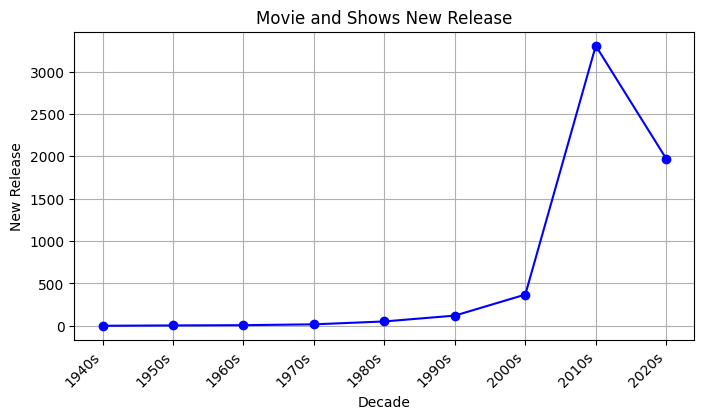

In [88]:
plt.figure(figsize=(8, 4))
plt.plot(Movies_and_Shows_count['decade'], Movies_and_Shows_count['movies_shows_count'], marker='o', linestyle='-', color='blue')
plt.title('Movie and Shows New Release')  
plt.xlabel("Decade")  
plt.ylabel("New Release" ) 
plt.xticks(rotation=45, ha='right')  
plt.grid(True)  
plt.show()

In [ ]:
#vote of age_certification

In [28]:
query= """
SELECT DISTINCT age_certification, 
ROUND(AVG(imdb_score),2) AS avg_imdb_score,
ROUND(AVG(tmdb_score),2) AS avg_tmdb_score
FROM Netflix_data
GROUP BY age_certification
ORDER BY avg_imdb_score DESC
"""
age_certifications_score=pd.read_sql(query,conn)
age_certifications_score

,age_certification,avg_imdb_score,avg_tmdb_score
0,TV-14,7.17,7.17
1,TV-PG,6.88,6.88
2,TV-Y7,6.81,6.81
3,TV-Y,6.54,6.54
4,TV-MA,6.46,6.46
5,PG-13,6.43,6.43
6,G,6.40,6.40
7,TV-G,6.34,6.34
8,R,6.30,6.30
9,PG,6.24,6.24


In [29]:
query= """
SELECT age_certification, 
COUNT(*) AS certification_count
FROM Netflix_data
WHERE type = 'MOVIE' 
AND age_certification != 'N/A'
GROUP BY age_certification
ORDER BY certification_count DESC
LIMIT 5;
"""
age_certifications_count=pd.read_sql(query,conn)
age_certifications_count

,age_certification,certification_count
0,TV-MA,2364
1,R,556
2,PG-13,451
3,PG,233
4,G,124


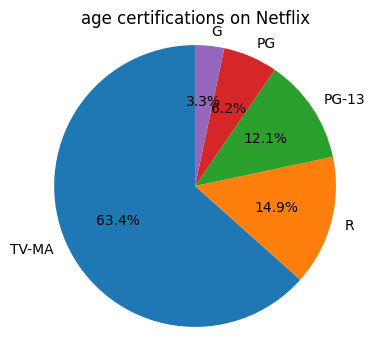

In [81]:
plt.figure(figsize=(4, 4))
plt.pie(age_certifications_count['certification_count'], labels=age_certifications_count['age_certification'],autopct='%1.1f%%', startangle=90)  
plt.title('age certifications on Netflix')  
plt.axis('equal')  
plt.show()

In [ ]:
#Top 10 genres

In [62]:
query="""
SELECT genres, 
COUNT(*) AS title_count
FROM Netflix_data 
WHERE type = 'MOVIE'
GROUP BY genres
ORDER BY title_count DESC
LIMIT 10;
"""
Top_10_Genres_Show=pd.read_sql(query,conn)
Top_10_Genres_Show

,genres,title_count
0,['comedy'],384
1,['documentation'],230
2,['drama'],224
3,"['comedy', 'documentation']",100
4,"['comedy', 'drama']",84
5,"['drama', 'romance']",76
6,"['drama', 'comedy']",65
7,"['comedy', 'romance']",60
8,"['romance', 'comedy']",48
9,"['comedy', 'drama', 'romance']",44


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, "['comedy']"),
  Text(1, 0, "['documentation']"),
  Text(2, 0, "['drama']"),
  Text(3, 0, "['comedy', 'documentation']"),
  Text(4, 0, "['comedy', 'drama']"),
  Text(5, 0, "['drama', 'romance']"),
  Text(6, 0, "['drama', 'comedy']"),
  Text(7, 0, "['comedy', 'romance']"),
  Text(8, 0, "['romance', 'comedy']"),
  Text(9, 0, "['comedy', 'drama', 'romance']")])

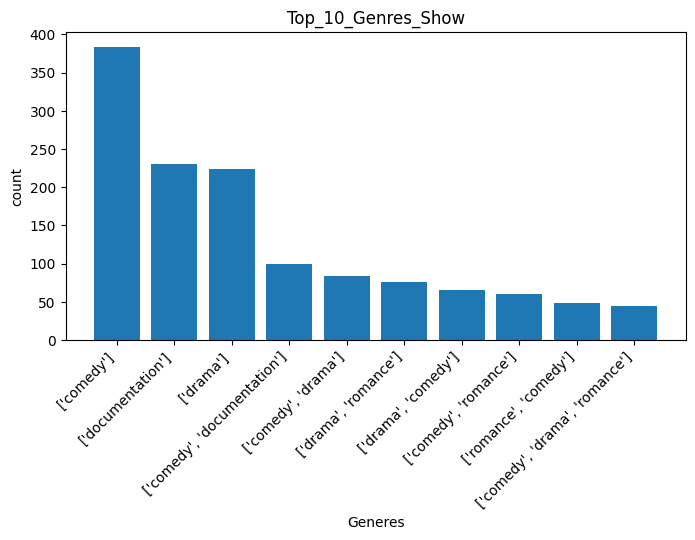

In [67]:
plt.figure(figsize=(8, 4))
plt.bar(Top_10_Genres_Show['genres'], Top_10_Genres_Show['title_count'])
plt.title("Top_10_Genres_Show")
plt.xlabel("Generes")
plt.ylabel("count")
plt.xticks(rotation=45, ha='right')  

In [31]:
query="""
SELECT genres, 
COUNT(*) AS title_count
FROM Netflix_data 
WHERE type = 'MOVIE' OR type='SHOW'
GROUP BY genres
ORDER BY title_count DESC
LIMIT 3;
"""
Top_3_Genres_Overall=pd.read_sql(query,conn)
Top_3_Genres_Overall

,genres,title_count
0,['comedy'],484
1,['documentation'],329
2,['drama'],328
